# Research on prepaid plans of the telecom company.

There is the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. 

The data on 500 Megaline clients are considered: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 

The purpose of the study: to analyze clients' behavior, carry out a preliminary analysis of the prepaid plans and determine which one brings in more revenue in order to adjust the advertising budget.

The Work Plan:

<a href='#section1'>1. Getting the data and study the general information</a>

<a href='#section2'>2. Data Preprocessing</a>

<a href='#section3'>3. Analyzing the Customers' Behavior</a>

<a href='#section4'>4. Analyzing the Revenue</a>

<a href='#section5'>5. Overall Conclusion</a>

## 1. Getting the data and study the general information.
<a id='section1'></a>

In [1]:
#importing of libraries
import pandas as pd
from functools import reduce
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt

#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

In [2]:
#reading files that contain the telecom operator's data 
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

#creating the list of tables and their descriptions
dfs_list = [users, calls, messages, internet, plans]
table_description = ['customer data', 'calls', 'text messages', 'web traffic', 'the prepaid plans'] 

#looking at the data's general information.
print(BOLD + 'General information' + END)
for df, name in zip(dfs_list, table_description):
    print(BOLD + 'The table containing information about ' + name + ':' + END)
    print(df.info())
    print()
    
#looking at the first few rows in a table    
for df, name in zip(dfs_list, table_description):
    print(BOLD + 'The first rows in the table containing information about ' + name + ':' + END)
    display(df.head())
    print()

General information
The table containing information about customer data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

The table containing information about calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

The table containing information about text messages:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 7605

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



The first rows in the table containing information about calls:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



The first rows in the table containing information about text messages:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



The first rows in the table containing information about web traffic:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



The first rows in the table containing information about the prepaid plans:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


*The first four tables contain information about __500 customers__ who made 137735 calls, sent 76051 text messages and opened 104825 sessions on the Internet. The last table contains information about two calling plans.*

*Only the `'churn_date'` column of the table with customers info have missing values and there are quite a few of them.
Thus, most of the customers continue to use the operator's services and this date has not been determined for them.*

*For the columns `'age'` of the table with customers info __int64__ is used. It seems excessive and would be enough __int8__.  For the `'reg_date'`, `'churn_date'`, `'call_date'`, `'message_date'` and `'session_date'` columns, it's nessecary to change the type to __datetime__ to make it convenient to work with dates.*

Numerical features
The 'age' column in the table containing customer data:


,count,mean,std,min,25%,50%,75%,max
age,500.0,45.5,17.0,18.0,30.0,46.0,61.0,75.0



The 'duration' column in the table containing calls data:


,count,mean,std,min,25%,50%,75%,max
duration,137735.0,6.7,5.8,0.0,1.3,6.0,10.7,37.6



The 'mb_used' column in the table containing web traffic data:


,count,mean,std,min,25%,50%,75%,max
mb_used,104825.0,366.7,277.2,0.0,136.1,344.0,554.6,1693.5



Histograms for numerical features


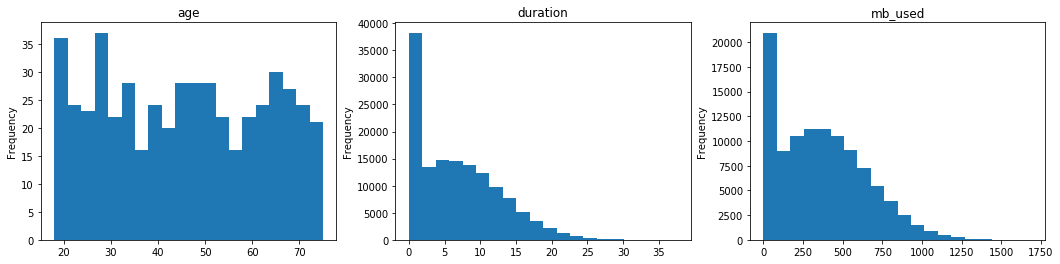

In [3]:
#Let's look at the values that take numerical features 
#creating the corresponding lists of tables and columns
num_tables = [users, calls, internet]
num_cols = ['age', 'duration', 'mb_used']
num_table_description = ['customer data', 'calls data', 'web traffic data']

print(BOLD + 'Numerical features' + END)
#looking at the values that take numerical features 
for table, col, description in zip(num_tables, num_cols, num_table_description):
    print(BOLD + "The '" + col + "' column in the table containing " + description + ':' + END)
    display(round(table[[col]].describe(), 1).T)
    print()

#function to plot several histograms in one line
def hist_in_row(tables, cols, bins_num=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, (table, col) in enumerate(zip(tables, cols)):
        axes[i%cols_num].hist(x=col, data=table, bins=bins_num)
        axes[i%cols_num].set_title(col)
        axes[i%cols_num].set_ylabel('Frequency')

print(BOLD + 'Histograms for numerical features' + END)
hist_in_row(num_tables, num_cols, 20)

*The dataset contains data about customers __between the ages of 18 and 75__. The feature `'age'` is about __uniform distributed__ across the sample.*

*__Customers talk on the phone for 6-7 minutes on average__ and there are __a lot of missed calls__ (assuming that a call duration of 0 minutes corresponds to a missed call, given that the provider is rounds seconds up to minutes). The maximum call duration is almost 38 minutes.*

*__Customers download 350 MB of data per session on average__. There are also a lot of sessions with zero traffic, possibly due to the fact that individual web sessions are not rounded up. The maximum traffic per session was slightly more than 1.5 GB.*

*In addition, the values for the column `'age'` are such that the type __int8__ would be enough for it.*

The percent of missing calls is 19.5%

The percent of missing calls of a customer by calling plans:


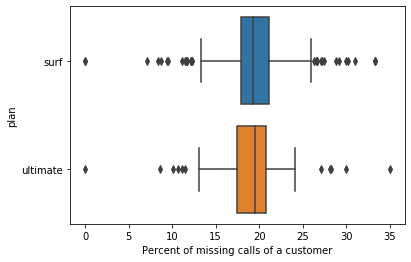

The percent of session with zero traffic is 13.1%

The share of customers by calling plans:


,number of customers,percent of customers
surf,339,67.8
ultimate,161,32.2



The share of customers by activities:


,number of customers,percent of customers
calls,481,96.2
messages,402,80.4
internet,489,97.8


In [4]:
#Let's look at shares of missed calls and sessions with zero web traffic,
#as well as the shares of customers by calling plans and by activities of using mobile networks.
print(BOLD + 'The percent of missing calls is ' + END + '{:.1%}'\
          .format(len(calls[calls.duration==0])/len(calls)))
print()

#Let's look at percent of missing calls of a user by calling plans
print(BOLD + 'The percent of missing calls of a customer by calling plans:' + END)
perc_missing_calls_by_users = (calls[calls.duration==0].user_id.value_counts()\
                                   /calls.user_id.value_counts()*100).fillna(0)
ax = sns.boxplot(x=perc_missing_calls_by_users,
                 y='plan', data=calls.merge(users, on='user_id', how='left').sort_values('plan'));
ax.set_xlabel('Percent of missing calls of a customer');
plt.show()

print(BOLD + 'The percent of session with zero traffic is ' + END + '{:.1%}'\
          .format(len(internet[internet.mb_used==0])/len(internet)))
print()

#looking at the number and percentage of customers by calling plans
print(BOLD + 'The share of customers by calling plans:' + END)
display(pd.DataFrame({'number of customers': users.plan.value_counts(),
                    'percent of customers': round(users.plan.value_counts() * 100 / len(users), 1)}))
print()

#function to calculate number and percentage of users in a table
def get_num_and_perc_of_users(df):
    return [len(df.user_id.unique()), len(df.user_id.unique())/len(users)*100]

#looking at the number and percentage of customers by activities
print(BOLD + 'The share of customers by activities:' + END)
display(pd.DataFrame([get_num_and_perc_of_users(calls),
                    get_num_and_perc_of_users(messages),
                    get_num_and_perc_of_users(internet)],
                    index = ['calls', 'messages', 'internet'],
                    columns=['number of customers', 'percent of customers']))

*The __share of missed calls is quite large - 19.5%__. Moreover, the typical share of missed calls of a customer varies from 15 to 25% regardless of the calling plan, which seems to be a rather large value. It may be worth checking the network coverage for customers under consideration or finding out other reasons for this.*

*The __percentage of sessions with zero traffic is also not small__, it might be worth looking at the source or type of traffic.*

*Among the customers of the dataset, __68%__ of customers use the __Surf__ prepaid plan, and __the rest - Ultimate__.*

*__4%__ of customers __don't make calls__, __2%__ of customers __don't use mobile internet__, and __20%__ of customers __don't send text messages__.*

### Conclusions

The dataset contains information about __500 customers__, more than __135 thousand__ of their __calls__, more than __76 thousand__ of their __text messages__ and almost __105 thousand__ of their __sessions on the Internet__.

Customers are __between 18 and 75 years old__. All age groups are equally represented. On average, they speak on the phone for 6-7 minutes and spend 350 MB of mobile traffic per session. 20% of customers don't send text messages.

__32%__ of customers have the __Ultimate__ prepaid plan and, accordingly, __68%__ have the __Surf__ prepaid plan.

There is a __large percent of missed calls__. It makes sense to check the coverage of network for users or identify possible reasons of this. It is also worth looking at __sessions with zero mobile traffic__, the share of which is also not small.

__Missing values__ are contained in only one column  `'churn_date'` in the table with information about the clients.
The values are only for those customers who have stopped using the services of the telecom operator, for other customers the value is not defined. Accordingly, these unknown values __do not need to be filled__.

In addition, the type of the column `'age'` can be converted to the type __int8__, the types of `'reg_date'`, `'churn_date'`, `'call_date'`, `'message_date'` and `'session_date'` columns to __datetime__.

## 2. Data preprocessing
<a id='section2'></a>

### Data type replacement

In [5]:
#converting excess type with help of astype() method:
users['age'] = users.age.astype('int8') 
#converting to datatime type :
users['reg_date'] = pd.to_datetime(users.reg_date, format='%Y-%m-%d') 
users['churn_date'] = pd.to_datetime(users.churn_date, format='%Y-%m-%d') 
calls['call_date'] = pd.to_datetime(calls.call_date, format='%Y-%m-%d') 
messages['message_date'] = pd.to_datetime(messages.message_date, format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet.session_date, format='%Y-%m-%d')

*Excess type for column `'age'` war converted to appropriate ones. The type for the `'reg_date'`, `'churn_date'`, `'call_date'`, `'message_date'` and `'session_date'` columns was changed to datetime to make them convenient to work with it.*

### Examing features with changed types

In [6]:
#Let's look at data range in the dataset
tables_list = [users, users, calls, messages, internet]
date_cols = ['reg_date', 'churn_date', 'call_date', 'message_date', 'session_date']

print(BOLD + 'Date range in the dataset:' + END)
for table, date_col in zip(tables_list, date_cols):
    display(table[[date_col]].agg(['min', 'max']))

Date range in the dataset:


,reg_date
min,2018-01-01
max,2018-12-31


,churn_date
min,2018-07-31
max,2018-12-31


,call_date
min,2018-01-15
max,2018-12-31


,message_date
min,2018-01-15
max,2018-12-31


,session_date
min,2018-01-15
max,2018-12-31


*The dataset contains data about customers who subscriped from January 1 to December 31, 2018. They started using the services on January 15th. Customers started churning on July 31st.*

Amount of data by month:


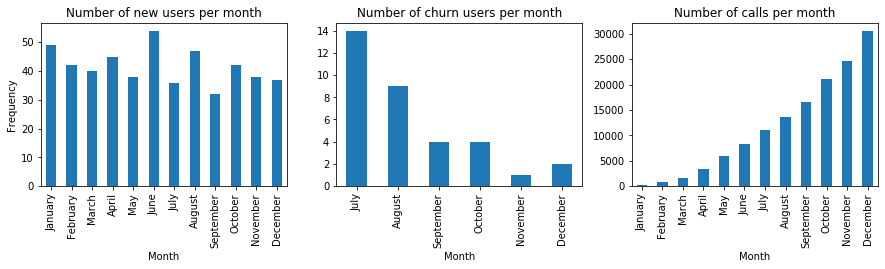

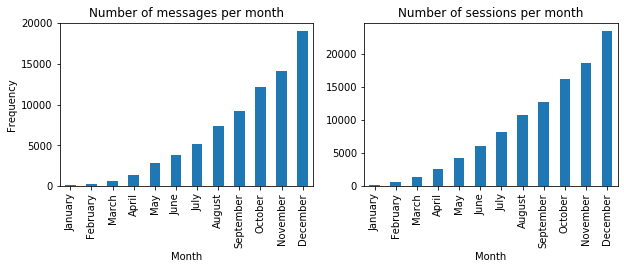

In [7]:
#Let's look at amount of data by month
print(BOLD + 'Amount of data by month:' + END)
descriptions = ['new users', 'churn users', 'calls', 'messages', 'sessions']

for i, (table, date_col, descr) in enumerate(zip(tables_list, date_cols, descriptions)):
    if i % 3 == 0:
        cols_num = 3 if i==0 else 2
        fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
        axes[i%3].set_ylabel('Frequency');
    table[date_col].dt.month.value_counts(sort=False).plot(kind='bar', ax=axes[i%3]);
    axes[i%3].set_xticklabels(table[date_col].sort_values().dt.strftime('%B').unique());
    axes[i%3].set_xlabel('Month');
    axes[i%3].set_title('Number of ' + descr + ' per month');

*About 40 new customers are added evenly every month, which increase the number of calls, text messages and sessions on the Internet every month. The unevenness of the data by months may cause a shift in some results, it is necessary to pay attention to this. User churn started in July and gradually declined towards the end of the year.*

### Additional calculations

In [8]:
#Let's calculate monthly data
#Rounding up individual calls:
calls['duration'] = calls.duration.apply(np.ceil)
#Calculation of the number of calls made and minutes used per month
calls_monthly = calls.pivot_table(index=['user_id', calls['call_date'].dt.month],\
                                  values='duration',\
                                  aggfunc=['count', 'sum']) 
calls_monthly.reset_index(inplace=True)
calls_monthly.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
print(BOLD + 'Monthly data for calls:' + END)
display(calls_monthly.head())
print()

#Calculation of the number of text messages sent per month
messages_monthly = messages.pivot_table(index=['user_id', messages['message_date'].dt.month],\
                                  values='message_date',\
                                  aggfunc=['count']) 
messages_monthly.reset_index(inplace=True)
messages_monthly.columns = ['user_id', 'month', 'messages_count']
print(BOLD + 'Monthly data for messages:' + END)
display(messages_monthly.head())
print()

#Calculation of the volume of data per month
internet_monthly = internet.pivot_table(index=['user_id', internet['session_date'].dt.month],\
                                  values='mb_used',\
                                  aggfunc=['sum']) 
internet_monthly.reset_index(inplace=True)
internet_monthly.columns = ['user_id', 'month', 'data_volume']
#Rounding up the total traffic volume for the month 
internet_monthly['data_volume'] = (internet_monthly.data_volume/1024).apply(np.ceil)
#Converted data volume allowance to GB
plans['gb_per_month_included'] = plans.mb_per_month_included / 1024
print(BOLD + 'Monthly data for web traffic volume:' + END)
display(internet_monthly.head())
print()

#Merging monthly data with user data and prepaid plan info 
data_frames = [calls_monthly, messages_monthly, internet_monthly]
monthly_activities = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'),
                            data_frames).fillna(0.0)
data = users.merge(monthly_activities, on='user_id').merge(plans, left_on='plan', right_on='plan_name')

#Calculation of the monthly revenue from each user 
data['revenue'] = data.usd_monthly_pay \
    + np.where(data.calls_duration > data.minutes_included, \
               (data.calls_duration - data.minutes_included) * data.usd_per_minute,
               0)\
    + np.where(data.messages_count > data.messages_included,\
               (data.messages_count - data.messages_included) * data.usd_per_message, 
               0)\
    + np.where(data.data_volume > data.gb_per_month_included,\
               (data.data_volume - data.gb_per_month_included) * data.usd_per_gb,
               0)

print(BOLD + 'Merged monthly data with user data:' + END)
display(data.head())

Monthly data for calls:


,user_id,month,calls_count,calls_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0



Monthly data for messages:


,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36



Monthly data for web traffic volume:


,user_id,month,data_volume
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0



Merged monthly data with user data:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_count,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,16.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12,9.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,84.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,10,71.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,11,63.0,...,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.0


*Calculated monthly data on the number and duration of calls, the number of text messages and monthly web traffic of each user, as well as the monthly revenue from each customer, which are necessary for further analysis.*

### Conclusions

The necessary type conversions have been made, including the datetime data type conversions. 

Then, for features of type datetime, the distribution of data by date was examined. Thus, the date set contains customer __data for 2018__. Approximately __the same number of users, about 40, is added every month__. Accordingly, __the number of calls, text messages and traffic volume is increasing__ due to them.

Additionally, for further analysis, monthly data on calls, text messages and the volume of web traffic for each user and also monthly revenue from each user were calculated.

## 3. Analyzing the Customers' Behavior. 
<a id='section3'></a>

Desciptive statistics for monthly activities by calling plans:
Surf


,min,max,mean,median,std,var
calls_duration,0.0,1510.0,428.7,425.0,234.5,54968.3
messages_count,0.0,266.0,31.2,24.0,33.6,1126.7
data_volume,0.0,70.0,16.7,17.0,7.8,61.6



Ultimate


,min,max,mean,median,std,var
calls_duration,0.0,1369.0,430.4,424.0,240.5,57844.5
messages_count,0.0,166.0,37.6,30.0,34.8,1208.8
data_volume,0.0,46.0,17.3,17.0,7.7,58.8



Destribution of features corresponding to customer monthly activities by calling plans:
Surf


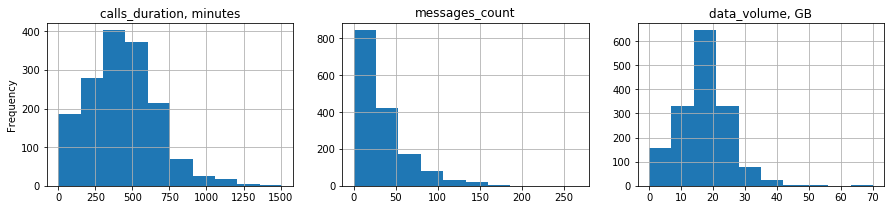

Ultimate


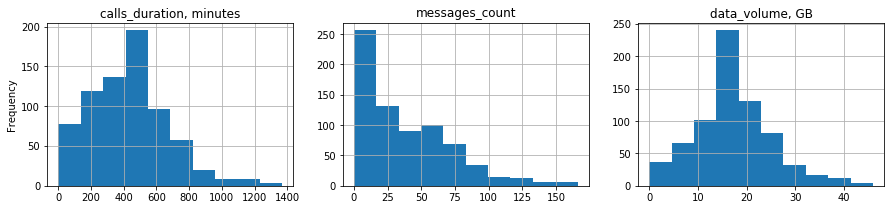

In [9]:
#Let's look at customers' activities and their requirements per month
#creating the corresponding list with activities
activities = ['calls_duration', 'messages_count', 'data_volume']

#looking at the descriptive statistics for each type of activity by calling plans
print(BOLD + 'Desciptive statistics for monthly activities by calling plans:' + END)
for name, group_data in data.groupby('plan'):
    print(BOLD + name.capitalize() + END)
    display(group_data[activities].agg(['min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
    print()

#function to plot several histograms in one line
def hist_in_row(data, features, description):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, (feature, descr) in enumerate(zip(features, description)):
        data[feature].hist(ax=axes[i%cols_num])
        axes[i%cols_num].set_title(feature + descr)
    axes[0].set_ylabel('Frequency');

#Let's look at dispersion of features corresponding to customer activities per month
print(BOLD + 'Destribution of features corresponding to customer monthly activities by calling plans:' + END)
for name, group_data in data.groupby('plan'):
    print(BOLD + name.capitalize() + END)
    hist_in_row(group_data, activities, [', minutes', '', ', GB'])
    plt.show()

*Customers of __both calling plans spend an average of 7 hours calling__ and __spend an average 17 GB of mobile traffic per month__. Customers of __Surf plan send an average 24 text messages per month__, the customers of __Ultimate plan send an average 30 text messages per month__. There are customers who do __not use calls, messages or the Internet__ at all. There are users of __both calling plans__ who __talk__ on the phone for __more than 20 hours a month__. Mean of messages count and data volume for both plans are greater than the medians, which implies that these features have outliers with large values. Thus, there are users of the __Ultimate__ plan, who __send 150 text messages per month__, and a user of the __Surf__ plan, who __sends 250 messages per month__. There is a user of the __Ultimate__ plan, who downloaded __46 GB__ of mobile traffic. And there is a user of the __Surf__ plan who downloaded more than __70 GB__ of data via the mobile Internet in a month. Dispersions of features corresponding to customer monthly activities by calling plans are simular.*

*The __distributions__ of respective features corresponding to these customer activities __for both calling plans__ are quate __simular__, with the exception of larger outliers values for the Surf plan.*  

Frequency density of features corresponding to customer monthly activities by calling plans:


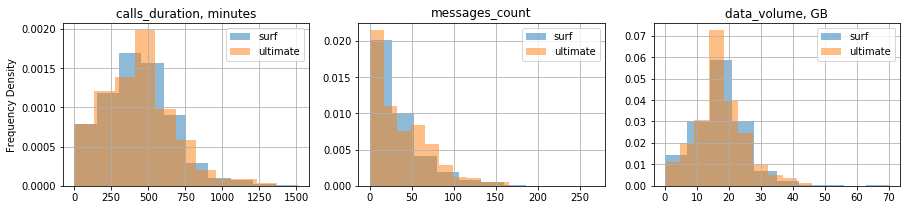

In [10]:
#Let's compare distribution of of the considered features for both plans on one graph
#function to plot several density plots in one line
def density_compare(features, description):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, (feature, descr) in enumerate(zip(features, description)):
        for name, group_data in data.groupby('plan'): 
            group_data[feature].hist(density=True, alpha=0.5, ax=axes[i%cols_num], label=name)
            axes[i%cols_num].set_title(feature + descr)
            axes[i%cols_num].legend()
    axes[0].set_ylabel('Frequency Density');

#Let's look at distribution of features corresponding to customer activities per month
print(BOLD + 'Frequency density of features corresponding to customer monthly activities by calling plans:' + END)
density_compare(activities, [', minutes', '', ', GB'])

*The __distributions__ of respective features corresponding to these customer activities __for both calling plans__ look indeed __simular__.*

Distribution of features corresponding to customer monthly activities by calling plans with the package limits:


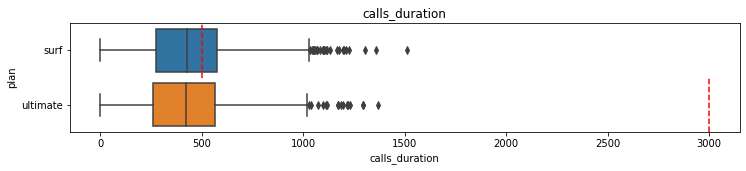

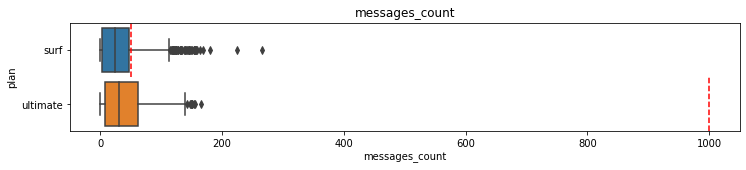

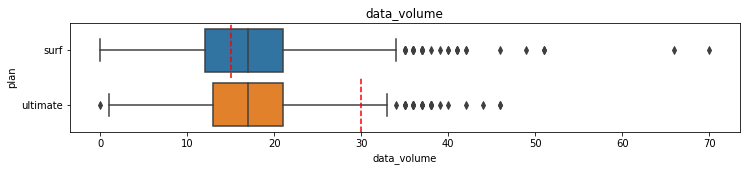

In [11]:
#Let's compare user requirements with the package limits
#creating dict to make it easier to get the package limits
plan_limits = {'calls_duration': 'minutes_included',
               'messages_count': 'messages_included', 
               'data_volume': 'gb_per_month_included'}


#function to plot several boxplots at once
def boxplot_compare(features):
    rows_num = len(features)
    for i, feature in enumerate(features):
        fig, ax = plt.subplots(figsize=(12, 2))
        sns.boxplot(y='plan', x=feature, data=data.sort_values('plan'), orient='h', ax=ax);
        ax.axvline(plans[plans.plan_name=='surf'][plan_limits[feature]].values[0],\
                                 ymin=0.5, ymax=1, color = 'r', linestyle='--')
        ax.axvline(plans[plans.plan_name=='ultimate'][plan_limits[feature]].values[0],\
                                 ymin=0, ymax=0.5, color = 'r', linestyle='--')
        ax.set_title(feature)

#plotting boxplots of features corresponding to customer activities per month by plans with plan limits
print(BOLD + 'Distribution of features corresponding to customer monthly activities '\
      + 'by calling plans with the package limits:' + END)
boxplot_compare(activities)

*__Surf packege limits are higher than the average customers requirements for calls and messages__. Internet limits alone do not cover the average customer needs. Accordingly, the telecom operator can receive __additional revenue__ mainly only __on the providing of additional mobile Internet__, which is not included in the package.*

*__Limitations of the Ultimate package cover the requirements of all users of this plan__, with the exception of a small number of web traffic values that are far from the main sample. So, the revenue from this calling plan will rarely exceed the cost of this package - $70.*

*Thus, Surf prepaid plan brings in more revenue than Ultimate, if the user has spent more than $50 (the difference between the cost of these packages) for exceeding mostly mobile traffic (when extra more than 7GB were downloded). Exceeding other package limits is less likely and costs much less.*

In [12]:
#Let's take a look at users who regularly (half a year and more) and significantly exceed package limits of Surf plan,
#i.e. their expenses exceed the cost of the calling plan by $ 50.

#calculating the number of users who exceed package limits and their ratio
surf_users_count = len(data[data.plan=='surf'].user_id.unique()) #all users
print('Number of customers who use the Surf calling plan:', surf_users_count)
print()
overspent_users_count = len(data[data.plan=='surf'].query('revenue-20>50').user_id.unique())
print('Number of customers who at least once exceeded the cost of the Surf plan by $ 50:',
      overspent_users_count, '- which is {:.1%}'.format(overspent_users_count/surf_users_count))
print()

#calculating the number of users who regularly and significantly exceed package limits and their ratio
#creating table of users who regularly exceed package limits with number of active and overspent months
signif_overspent_users = pd.DataFrame({'active_months_count': data[data.plan=='surf'].user_id.value_counts(),
              'avg_monthly_revenue': round(data[data.plan=='surf'].groupby('user_id').revenue.mean(), 2),
              'overspent_months_count': data[data.plan=='surf'].query('revenue-20>50').user_id.value_counts(),
              'overspent_months_percent': round((data[data.plan=='surf'].query('revenue-20>50')\
                                                    .user_id.value_counts()\
                                                /data[data.plan=='surf'].user_id.value_counts() * 100), 1)
}).dropna().query('overspent_months_count>5').sort_values('overspent_months_percent', ascending=False)\
    .rename_axis('user_id').reset_index()

#not all users used the operator's services during the entire year under consideration
long_active_surf_users_count = sum(data[data.plan=='surf'].user_id.value_counts()>5)
print('Number of customers who use the Surf calling plan and are active for half a year or more:',
      long_active_surf_users_count)
print()
print('Number of customers who regularly (half a year or more) exceed the cost of the Surf plan by $50:',
      len(signif_overspent_users),
      '- which is {:.1%}'.format(len(signif_overspent_users)/long_active_surf_users_count))
print()
print(BOLD + 'Customers who regularly (half a year or more) exceed the cost of Surf plan by $50:' + END)
display(signif_overspent_users)

Number of customers who use the Surf calling plan: 333

Number of customers who at least once exceeded the cost of the Surf plan by $ 50: 187 - which is 56.2%

Number of customers who use the Surf calling plan and are active for half a year or more: 119

Number of customers who regularly (half a year or more) exceed the cost of the Surf plan by $50: 16 - which is 13.4%

Customers who regularly (half a year or more) exceed the cost of Surf plan by $50:


,user_id,active_months_count,avg_monthly_revenue,overspent_months_count,overspent_months_percent
0,1147,8,199.35,8.0,100.0
1,1201,7,163.47,7.0,100.0
2,1223,6,97.44,6.0,100.0
3,1292,6,263.33,6.0,100.0
4,1359,11,145.56,10.0,90.9
5,1268,10,183.09,9.0,90.0
6,1328,9,133.84,8.0,88.9
7,1374,9,156.13,8.0,88.9
8,1009,8,109.83,7.0,87.5
9,1127,7,95.71,6.0,85.7


*__Quite a lot of customers of the Surf plan exceeded the package cost at least at once - 56% of them__. But in order for the Surf plan brings in more revenue than the Ultimate plan, it is necessary that the customers regularly exceed the package limits. __13% of customers__ among those who use the operator's services for a long time __exceed the package cost by $50 regularly__ (for six months or more). For those customers the Surf plan brings in more revenue. It makes sense to understand what distinguishes these customers from the rest, perhaps the age group, location, nature of calls, Internet resources they use. We need to look at such customers on the main sample and try to cluster them.*

### Conclusions

__The customers' behavior for both calling plans is quite simular__. They __talk on the phone an average of 7 hours__, __send 25-30 messages__ and __spend an average 17 GB__ of mobile traffic __per month__. 

__The Surf package limits are higher than the average customer call and message requirements__. Only __Internet limits do not cover the needs__ of ordinary customers. Thus, the telecom operator can get __additional revenue mainly__ by providing __additional mobile Internet__. The __Ultimate__ package limits __cover the requirements of almost all customers__ of this calling plan. So the revenue from the Ultimate calling plan will rarely exceed its cost. Thus, the Surf plan brings in more revenue than the Ultimate plan if the customer regularly spent more than the difference between the cost of these packages, mainly due to excess mobile traffic.

More than half of the customers of the Surf calling plan at least once exceeded the price of the package by \\$50 (the difference between the cost of the Surf and Ultimate packages). 13\% of customers who use the operator's services for a long time exceed the package cost by $50 on a regular basis. It makes sense to understand what distinguishes these customers from the rest and offer the Surf plan to a similar targitet audience since it brings in more revenue.

## 4. Analyzing the Revenue and Test the Hypotheses 
<a id='section4'></a>

Desciptive statistics for monthly revenue by calling plans:
Surf


,count,min,max,mean,median,std,var
revenue,1573.0,20.0,590.4,60.7,40.4,55.4,3067.8



Ultimate


,count,min,max,mean,median,std,var
revenue,720.0,70.0,182.0,72.3,70.0,11.4,129.8



Distribution of monthly revenue by calling plans:


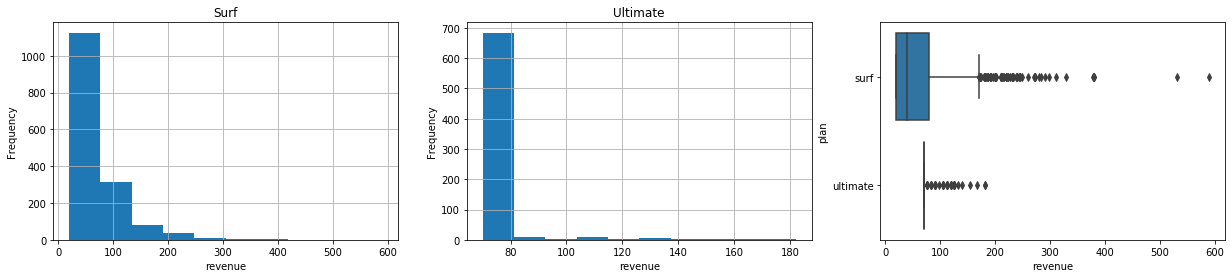

In [13]:
#Let's look at descriptive statictics and distribution of revenue by calling plans 
#printing the descriptive statistics of revenue by calling plans
print(BOLD + 'Desciptive statistics for monthly revenue by calling plans:' + END)
for name, group_data in data.groupby('plan'):
    print(BOLD + name.capitalize() + END)
    display(group_data[['revenue']].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
    print()

print(BOLD + 'Distribution of monthly revenue by calling plans:' + END)
fig, axes = plt.subplots(ncols=3, figsize=(7*3, 4))
for i, (name, group_data) in enumerate(data.groupby('plan')):
    group_data.revenue.hist(ax=axes[i%3])
    axes[i%3].set_title(name.capitalize())
    axes[i%3].set_ylabel('Frequency');
    axes[i%3].set_xlabel('revenue');
sns.boxplot(y='plan', x='revenue', data=data.sort_values('plan'), orient='h', ax=axes[2]);

*The __average monthly revenue__ from a __Surf__ plan customer is __\\$40__ and __\\$70__ from a __Ultimate__ plan customers. __The minimum monthly revenue coincides with the package cost__ and is \\$20 and \\$70 for Surf and Ultimate, respectively. The maximum monthly revenue from customers of the Surf calling plan was almost \\$590 and \\$180 from customers of the Ultimate calling plan. __Mean of monthly revenue__ of __Surf__ plan is __greater__ than the __median__, which implies that there are __outliers with large values__. The monthly revenue of __Ultimate__ plan has __small variation__, almost all values are \\$70.*

*The distribution of the __Revenue random variable__ does __not__ have the form of a __normal distribution__.*

Q-Q Plots for revenue of Surf and Ultimate plans:


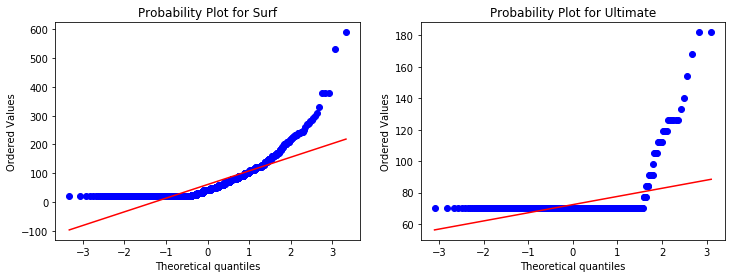

Shapiro-Wilk normality tests:
Hypotheses:
H₀: Revenue for Surf is distributed normally
H₁: Revenue for Surf is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀

Hypotheses:
H₀: Revenue for Ultimate is distributed normally
H₁: Revenue for Ultimate is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀



In [14]:
#Let's formally test the hypothesis that the distribution of samples is normal
print(BOLD + 'Q-Q Plots for revenue of Surf and Ultimate plans:' + END)
fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
for i, (name, group_data) in enumerate(data.groupby('plan')):
    st.probplot(group_data.revenue, dist="norm", plot=axes[i%2])
    axes[i%2].set_title('Probability Plot for ' + name.capitalize())
plt.show()

#Let's test the hypothesis that the distribution of samples is normal using the Shapiro-Wilk normality test
print(BOLD + 'Shapiro-Wilk normality tests:' + END)
alpha = 0.05
for name, group_data in data.groupby('plan'):
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Revenue for ' + name.capitalize() + ' is distributed normally' + END)
    print(BOLD + 'H\u2081: Revenue for ' + name.capitalize() + ' is not distributed normally' + END)
    norn_pvalue = st.shapiro(group_data.revenue)[1]
    print("Shapiro-Wilk normality test, p-value: ", round(norn_pvalue, 4))
    if (norn_pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 
    print()

*The __distribution of revenue__ is most likely __different from the normal one__, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curve for Surf revenue and some of the points for Ultimate revenue lie very far from the straight line.*

*Shapiro-Wilk normality tests also reject the hypothesis $H_0$ that the distribution of samples is normal.*

*Thus, we can not use a parametric Student's t-test in order to compare the average revenue from users of Ultimate and Surf calling plans.*

In [15]:
#Let's test the hypothesis that the revenue from users of Ultimate and Surf calling plans are differ
#using the Mann-Whitney U test
print(BOLD + 'Mann-Whitney U test:' + END)
alpha = 0.05
print('Hypotheses:')
print(BOLD 
      + 'H\u2080: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are equal.'
      + END)
print(BOLD 
      +'H\u2081: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are not equal.' 
      + END)
revenue_pvalue = st.mannwhitneyu(data[data.plan=='surf'].revenue, data[data.plan=='ultimate'].revenue,\
                                 alternative='two-sided')[1]
print("Mann-Whitney U test, p-value: ", round(revenue_pvalue, 4))
if (revenue_pvalue < alpha): 
    print("We reject the hypothesis H\u2080") 
else: 
    print("We can't reject the hypothesis H\u2080") 

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are equal.
H₁: Sample distributions of the revenue from customers of Ultimate and Surf calling plans are not equal.
Mann-Whitney U test, p-value:  0.0
We reject the hypothesis H₀


*__The Mann-Whitney U test rejects the null hypothesis about equality of revenue distributions of both calling plans__.  Thus, there is likely some difference between the samples. The __median of the revenue__ from customers of __Ultimate__ calling plan is __\\$70__. The __median__ revenue from __Surf__ customers is __\\$40__. The Ultimate plan brings in more revenue in average.*

Desciptive statistics for monthly revenue from customers in New York - New Jersey area and others:
in New York - New Jersey area


,count,min,max,mean,median,std,var
revenue,377.0,20.0,280.0,59.9,51.8,43.5,1895.5


not in New York - New Jersey area


,count,min,max,mean,median,std,var
revenue,1916.0,20.0,590.4,65.2,70.0,47.2,2225.0



Distribution of monthly revenue from customers in New York - New Jersey area and in other regions:


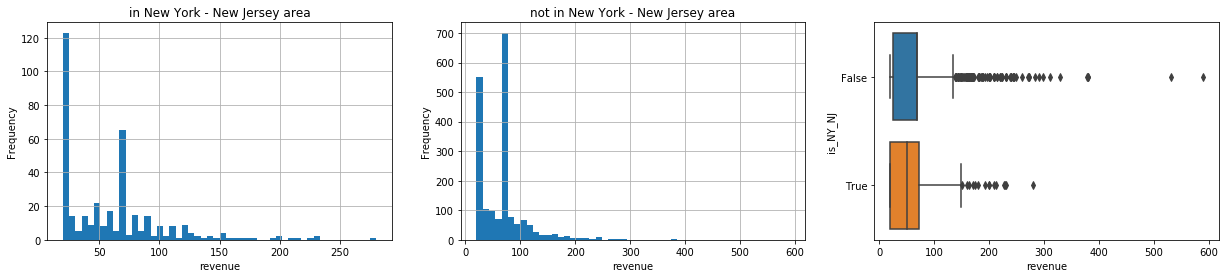

Share of Surf and Ultimate customers in New York - New Jersey area and in other regions:


plan,surf,ultimate
is_NY_NJ,,
False,0.658142,0.341858
True,0.827586,0.172414


In [16]:
#Let's look at descriptive statictics and distribution of revenue from users in NY-NJ area and from users of other regions.
#creating the corresponding lists of samples and their description
samples = [data[data.city.str.contains('NY-NJ')], data[~data.city.str.contains('NY-NJ')]]
sample_descriptions = ['in New York - New Jersey area',
                       'not in New York - New Jersey area']
#printing the descriptive statistics of revenue from users in NY-NJ area and others 
print(BOLD + 'Desciptive statistics for monthly revenue from customers in New York - New Jersey area and others:'
      + END)
for sample, descr in zip(samples, sample_descriptions):
    print(BOLD + descr + END)
    display(sample[['revenue']].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
print()


print(BOLD + 'Distribution of monthly revenue from customers in New York - New Jersey area and in other regions:' + END)
fig, axes = plt.subplots(ncols=3, figsize=(7*3, 4))
for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
    sample.revenue.hist(ax=axes[i], bins=50)
    axes[i].set_ylabel('Frequency');
    axes[i].set_xlabel('revenue');
    axes[i].set_title(descr)
sns.boxplot(y='is_NY_NJ', x='revenue', orient='h', ax=axes[2],\
            data=data.assign(is_NY_NJ=['NY-NJ' in name for name in data.city]));
plt.show()

print(BOLD + 'Share of Surf and Ultimate customers in New York - New Jersey area and in other regions:' + END)
data.assign(is_NY_NJ=['NY-NJ' in name for name in data.city])\
    .pivot_table(index='is_NY_NJ', values='revenue', columns='plan', aggfunc='count')\
        .div(data.assign(is_NY_NJ=['NY-NJ' in name for name in data.city]).is_NY_NJ.value_counts().values, axis=0)

*The __median of monthly revenue__ from customers in __New York - New Jersey area__ is __\\$51__ and __\\$70__ from others customers. __The minimum monthly revenue coincides with the Surf package cost__ and is \\$20.*

*__In all regions, customers choose Surf calling plan more often__, but in NY-NJ area much more often (see Share of Surf and Ultimate customers). And at the same time __customers in NY-NJ area oft do not exceed the package limits__ (the bar on NY-NJ area histogram with value $20 is greater one with value \\$70, the bar on not NY-NJ area histogram with value \\$20 is less one with value \\$70).*

*The distribution of the __Revenue of areas under consideration__ does __not__ have the form of a __normal distribution__.*

Q-Q Plots for revenue from customers in New York - New Jersey area and from others regions:


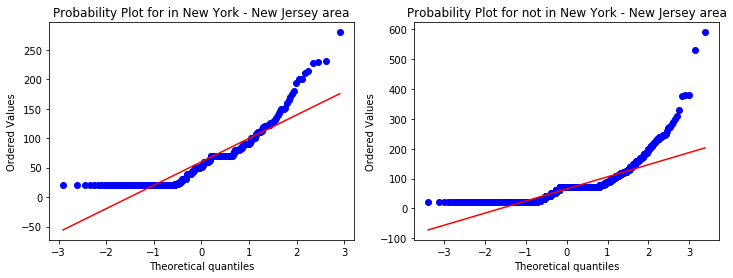

Shapiro-Wilk normality tests:
Hypotheses:
H₀: Revenue from customers in New York - New Jersey area is distributed normally
H₁: Revenue from customers in New York - New Jersey area is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀

Hypotheses:
H₀: Revenue from customers not in New York - New Jersey area is distributed normally
H₁: Revenue from customers not in New York - New Jersey area is not distributed normally
Shapiro-Wilk normality test, p-value:  0.0
We reject the hypothesis H₀



In [17]:
#Let's formally test the hypothesis that the distribution of samples is normal
print(BOLD + 'Q-Q Plots for revenue from customers in New York - New Jersey area and from others regions:' + END)
fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
    st.probplot(sample.revenue, dist="norm", plot=axes[i])
    axes[i].set_title('Probability Plot for ' + descr)
plt.show()

#Let's test the hypothesis that the distribution of samples is normal using the Shapiro-Wilk normality test
print(BOLD + 'Shapiro-Wilk normality tests:' + END)
alpha = 0.05
for sample, descr in zip(samples, sample_descriptions):
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Revenue from customers ' + descr + ' is distributed normally' + END)
    print(BOLD + 'H\u2081: Revenue from customers ' + descr + ' is not distributed normally' + END)
    norn_pvalue = st.shapiro(sample.revenue)[1]
    print("Shapiro-Wilk normality test, p-value: ", round(norn_pvalue, 4))
    if (norn_pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 
    print()

*The __distribution of revenue of areas under consideration__ is most likely __different from the normal one__, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curves.*

*Shapiro-Wilk normality tests also reject the hypothesis $H_0$ that the distribution of samples is normal.*

*Thus, we can not use a parametric Student's t-test in order to compare the average revenue from customers in areas under consideration.*

In [18]:
#Let's test the hypothesis that the revenue from users in NY-NJ area is different from 
#that of the users from other regions using the Mann-Whitney U test
print(BOLD + 'Mann-Whitney U test:' + END)
alpha = 0.05
print('Hypotheses:')
print(BOLD + 'H\u2080: Sample distributions of the revenue from customers in New York - New Jersey area')
print(BOLD + '    and the revenue from customers from other regions are equal.'+ END)
print(BOLD +'H\u2081: Sample distributions of the revenue from customers in New York - New Jersey area')
print(BOLD +  '    and the revenue from customers from other regions are not equal.' + END)
revenue_pvalue = st.mannwhitneyu(data[data.city.str.contains('NY-NJ')].revenue,
                                 data[~data.city.str.contains('NY-NJ')].revenue,
                                 alternative='two-sided')[1]
print("Mann-Whitney U test, p-value: ", round(revenue_pvalue, 4))
if (revenue_pvalue < alpha): 
    print("We reject the hypothesis H\u2080") 
else: 
    print("We can't reject the hypothesis H\u2080") 

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of the revenue from customers in New York - New Jersey area
    and the revenue from customers from other regions are equal.
H₁: Sample distributions of the revenue from customers in New York - New Jersey area
    and the revenue from customers from other regions are not equal.
Mann-Whitney U test, p-value:  0.0039
We reject the hypothesis H₀


*__The Mann-Whitney U test rejects the null hypothesis about equality of distributions of revenue from customers in areas under consideration__.  Thus, there is likely some difference between the samples. The median of monthly revenue from customers in New York - New Jersey area is \\$51 and \\$70 from customers from other region. Not NY-NJ area customers bring in more revenue due to the fact that they more often choose the Ultimate calling plan and if they choose the Surf calling plan, they more often exceed the package limits. Perhaps the region is a sign of distinguishing customers who are more likely to exceed package limits.*

### Conclusions



 __The null hypothesis that the revenue from customers of Ultimate and Surf calling plans are equal against the two-sided alternative is rejected at the 5% significance level__ using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality. The median of the revenue from customers of Ultimate calling plan is \\$70. The median revenue from Surf customers is \\$40. The Ultimate plan brings in more revenue in average.

__The null hypothesis that the revenue from customers in NY-NJ area is equal to that of the customers from other regions against the two-sided alternative is rejected at the 5% significance level__ using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality. The median of monthly revenue from customers in NY-NJ area is \\$51 and \\$70 from customers from other regions. Not NY-NJ area customers bring in more revenue due to the fact that they more often choose the Ultimate calling plan and if they choose the Surf calling plan, they more often exceed the package limits. 

## 5. Overall Conclusion
<a id='section5'></a>

There are data of the telecom operator on 500 clients to further assess analyze clients' behavior and determine which prepaid plan brings in more revenue.

Before proceeding to the analysis, the data was preprocessed:
* After a general review of the data revealed:
    - column corresponding to churn date contains mostly only unknown values, which correspond to the fact that the client has not stopped using the operator's services.
    - There is a large percent of missed calls and many sessions with zero traffic. It makes sense to check the coverage of network for clients or identify possible reasons of this. 

* The some types were converted to appropriate ones.

* For further analysis, monthly data on calls, text messages and the volume of web traffic for each client and also monthly revenue were calculated.

During the preliminary analysis of the plans, it turned out:
* Most of the clients have the Surf calling plan (68%). 
* The customers' behavior for both calling plans is quite simular.
* The Surf package limits are higher than the average customer call and message requirements. Only Internet limits do not cover the needs of ordinary customers. The telecom operator can get additional revenue mainly by providing additional mobile Internet. 
* The Ultimate package limits cover the requirements of almost all customers of this calling plan. The revenue from the Ultimate calling plan will rarely exceed its cost.
* Some customers of the Surf calling plan significantly exceed the package cost by \\$50 on a regular basis. From these clients the Surf plan brings in more revenue than the Ultimate plan.

Recommendations for the commercial department:

* User Acquisition
    - Offer the Surf calling plan to targitet audience who tend to exceed the package limits. Additional analysis is requared to identify what distinguishes these clients from the rest (The region can be such a sign, since not NY-NJ area customers bring in more revenue due to the fact that they more often exceed the package limits of Surf calling plan).
    - Offer the Ultimate calling plan to rest targitet audience, since the Ultimate plan brings in more revenue in average. The average difference is \\$30. This diffrence should be taken into account considering the cost of user acquisition for different calling plans and adjusting the advertising budget. Most likely, it is easier to offer the Ultimete calling plan to the target audience not from New York - New Jersey area, since they choose this plan more often.
* Working with subscriped clients
    - Offer to upgrade to Ultimet calling plan for customers who occasionally exceed the package limits of Surf calling plan
    - Do not offer upgrade to Ultimet for customers who regularly significantly exceed the package limits of Surf calling plan